# Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

2022-05-06 12:19:36.360320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-06 12:19:36.360379: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Create training and evaluation datasets

In [2]:
def get_train_and_test_splits(train_size, batch_size=1):
    dataset = (
        tfds.load(name="wine_quality", as_supervised=True, split="train")
        .map(lambda x, y: (x, tf.cast(y, tf.float32)))
        .prefetch(buffer_size=dataset_size)
        .cache()
    )
    
    train_dataset = (dataset.take(train_size).shuffle(buffer_size=train_size).batch(batch_size))
    test_dataset = dataset.skip(train_size).batch(batch_size)
    
    return train_dataset, test_dataset

# Compile, train and evaluate the model

In [3]:
hidden_units = [8, 8]
learning_rate = 0.001

def run_experiment(model, loss, train_dataset, test_dataset):
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=loss,
        metrics=[keras.metrics.RootMeanSquaredError()],
    )
    
    print("Start training the model ...")
    history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)
    print("Model training finished")
    _, rmse = model.evaluate(train_dataset, verbose=0)
    print(f"Train RMSE: {round(rmse, 3)}")
    
    print("Evaluating model performance ...")
    _, rmse = model.evaluate(test_dataset, verbose=0)
    print(f"Test RMSE: {round(rmse, 3)}")
    
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.legend(["train", "validation"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")

# Create model inputs

In [4]:
FEATURE_NAMES = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
]

def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        inputs[feature_name] = layers.Input(name=feature_name, shape=(1,), dtype=tf.float32)
    return inputs

# Experiment 1: standard neural network

In [5]:
def create_baseline_model():
    inputs = create_model_inputs()
    input_values = [value for _, value in sorted(inputs.items())]
    features = keras.layers.concatenate(input_values)
    features = layers.BatchNormalization()(features)
    
    for units in hidden_units:
        features = layers.Dense(units, activation="sigmoid")(features)
    outputs = layers.Dense(units=1)(features)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

2022-05-06 12:19:40.014436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-06 12:19:40.014470: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-06 12:19:40.014491: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MPC): /proc/driver/nvidia/version does not exist
2022-05-06 12:19:40.014770: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Start training the model ...
Epoch 1/100
14/17 [=======================>......] - ETA: 0s - loss: 15.5715 - root_mean_squared_error: 3.9461 

2022-05-06 12:19:41.568478: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-05-06 12:19:41.571860: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


17/17 [==============================] - 2s 37ms/step - loss: 15.4663 - root_mean_squared_error: 3.9327 - val_loss: 14.8236 - val_root_mean_squared_error: 3.8501
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 13.9400 - root_mean_squared_error: 3.7336 - val_loss: 13.4340 - val_root_mean_squared_error: 3.6652
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 12.6308 - root_mean_squared_error: 3.5540 - val_loss: 12.0206 - val_root_mean_squared_error: 3.4671
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 11.3702 - root_mean_squared_error: 3.3720 - val_loss: 10.6342 - val_root_mean_squared_error: 3.2610
Epoch 5/100
17/17 [==============================] - 0s 10ms/step - loss: 10.1507 - root_mean_squared_error: 3.1860 - val_loss: 9.2998 - val_root_mean_squared_error: 3.0496
Epoch 6/100
17/17 [==============================] - 0s 10ms/step - loss: 8.9768 - root_mean_squared_error: 2.9961 - val_loss: 8.0406 - val_root

17/17 [==============================] - 0s 9ms/step - loss: 0.5705 - root_mean_squared_error: 0.7553 - val_loss: 0.5603 - val_root_mean_squared_error: 0.7485
Epoch 49/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5724 - root_mean_squared_error: 0.7565 - val_loss: 0.5595 - val_root_mean_squared_error: 0.7480
Epoch 50/100
17/17 [==============================] - 0s 9ms/step - loss: 0.5693 - root_mean_squared_error: 0.7545 - val_loss: 0.5593 - val_root_mean_squared_error: 0.7478
Epoch 51/100
17/17 [==============================] - 0s 10ms/step - loss: 0.5682 - root_mean_squared_error: 0.7538 - val_loss: 0.5575 - val_root_mean_squared_error: 0.7467
Epoch 52/100
17/17 [==============================] - 0s 10ms/step - loss: 0.5680 - root_mean_squared_error: 0.7536 - val_loss: 0.5566 - val_root_mean_squared_error: 0.7460
Epoch 53/100
17/17 [==============================] - 0s 10ms/step - loss: 0.5675 - root_mean_squared_error: 0.7533 - val_loss: 0.5562 - val_root_mean_

17/17 [==============================] - 0s 10ms/step - loss: 0.5387 - root_mean_squared_error: 0.7339 - val_loss: 0.5295 - val_root_mean_squared_error: 0.7276
Epoch 96/100
17/17 [==============================] - 0s 10ms/step - loss: 0.5397 - root_mean_squared_error: 0.7347 - val_loss: 0.5299 - val_root_mean_squared_error: 0.7279
Epoch 97/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5388 - root_mean_squared_error: 0.7340 - val_loss: 0.5284 - val_root_mean_squared_error: 0.7269
Epoch 98/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5375 - root_mean_squared_error: 0.7331 - val_loss: 0.5295 - val_root_mean_squared_error: 0.7277
Epoch 99/100
17/17 [==============================] - 0s 10ms/step - loss: 0.5360 - root_mean_squared_error: 0.7321 - val_loss: 0.5273 - val_root_mean_squared_error: 0.7261
Epoch 100/100
17/17 [==============================] - 0s 10ms/step - loss: 0.5372 - root_mean_squared_error: 0.7329 - val_loss: 0.5272 - val_root_mea

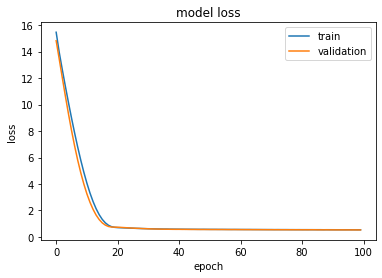

In [6]:
dataset_size = 4898
batch_size = 256
train_size = int(dataset_size*0.85)
train_dataset, test_dataset = get_train_and_test_splits(train_size, batch_size)

num_epochs = 100
mse_loss = keras.losses.MeanSquaredError()
baseline_model = create_baseline_model()
run_experiment(baseline_model, mse_loss, train_dataset, test_dataset)

In [7]:
sample = 10
examples, targets = list(test_dataset.unbatch().shuffle(batch_size*10).batch(sample))[0]

predicted = baseline_model(examples).numpy()
for idx in range(sample):
    print(f"Predicted: {round(float(predicted[idx][0]),1)} - Actual: {targets[idx]}")

Predicted: 6.2 - Actual: 7.0
Predicted: 6.4 - Actual: 7.0
Predicted: 6.3 - Actual: 6.0
Predicted: 4.9 - Actual: 4.0
Predicted: 6.0 - Actual: 5.0
Predicted: 6.5 - Actual: 6.0
Predicted: 5.5 - Actual: 5.0
Predicted: 6.6 - Actual: 6.0
Predicted: 6.0 - Actual: 5.0
Predicted: 6.4 - Actual: 6.0


# Experiment 2: Bayesian neural network (BNN)

In [8]:
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model

def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model

In [9]:
def create_bnn_model(train_size):
    inputs = create_model_inputs()
    features = keras.layers.concatenate(list(inputs.values()))
    features = layers.BatchNormalization()(features)
    
    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)
        
        outputs = layers.Dense(units=1)(features)
        model = keras.Model(inputs=inputs, outputs=outputs)
        return model

## Train BNN with a small training subset

Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


2022-05-06 12:20:03.534943: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


Start training the model ...
Epoch 1/500
5/5 [==============================] - 2s 211ms/step - loss: 38.1183 - root_mean_squared_error: 6.1732 - val_loss: 37.7110 - val_root_mean_squared_error: 6.1403
Epoch 2/500
5/5 [==============================] - 0s 32ms/step - loss: 38.0403 - root_mean_squared_error: 6.1671 - val_loss: 41.3094 - val_root_mean_squared_error: 6.4266
Epoch 3/500
5/5 [==============================] - 0s 32ms/step - loss: 37.5113 - root_mean_squared_error: 6.1239 - val_loss: 37.2208 - val_root_mean_squared_error: 6.1005
Epoch 4/500
5/5 [==============================] - 0s 32ms/step - loss: 39.0163 - root_mean_squared_error: 6.2457 - val_loss: 32.5813 - val_root_mean_squared_error: 5.7071
Epoch 5/500
5/5 [==============================] - 0s 32ms/step - loss: 37.8527 - root_mean_squared_error: 6.1518 - val_loss: 37.9663 - val_root_mean_squared_error: 6.1610
Epoch 6/500
5/5 [==============================] - 0s 28ms/step - loss: 38.4274 - root_mean_squared_error: 6.1

5/5 [==============================] - 0s 32ms/step - loss: 24.3457 - root_mean_squared_error: 4.9330 - val_loss: 25.9123 - val_root_mean_squared_error: 5.0894
Epoch 49/500
5/5 [==============================] - 0s 25ms/step - loss: 22.9000 - root_mean_squared_error: 4.7843 - val_loss: 21.1241 - val_root_mean_squared_error: 4.5951
Epoch 50/500
5/5 [==============================] - 0s 22ms/step - loss: 24.4359 - root_mean_squared_error: 4.9420 - val_loss: 21.6246 - val_root_mean_squared_error: 4.6491
Epoch 51/500
5/5 [==============================] - 0s 29ms/step - loss: 23.0258 - root_mean_squared_error: 4.7976 - val_loss: 23.1045 - val_root_mean_squared_error: 4.8059
Epoch 52/500
5/5 [==============================] - 0s 30ms/step - loss: 25.0610 - root_mean_squared_error: 5.0052 - val_loss: 24.8591 - val_root_mean_squared_error: 4.9848
Epoch 53/500
5/5 [==============================] - 0s 32ms/step - loss: 23.5037 - root_mean_squared_error: 4.8470 - val_loss: 25.0497 - val_root_me

5/5 [==============================] - 0s 31ms/step - loss: 12.5703 - root_mean_squared_error: 3.5438 - val_loss: 14.1807 - val_root_mean_squared_error: 3.7646
Epoch 96/500
5/5 [==============================] - 0s 31ms/step - loss: 12.3806 - root_mean_squared_error: 3.5168 - val_loss: 12.4712 - val_root_mean_squared_error: 3.5298
Epoch 97/500
5/5 [==============================] - 0s 32ms/step - loss: 13.8011 - root_mean_squared_error: 3.7133 - val_loss: 10.8847 - val_root_mean_squared_error: 3.2977
Epoch 98/500
5/5 [==============================] - 0s 31ms/step - loss: 13.0263 - root_mean_squared_error: 3.6076 - val_loss: 12.5432 - val_root_mean_squared_error: 3.5395
Epoch 99/500
5/5 [==============================] - 0s 31ms/step - loss: 11.8683 - root_mean_squared_error: 3.4432 - val_loss: 12.3314 - val_root_mean_squared_error: 3.5101
Epoch 100/500
5/5 [==============================] - 0s 32ms/step - loss: 11.8964 - root_mean_squared_error: 3.4475 - val_loss: 12.2141 - val_root_m

5/5 [==============================] - 0s 30ms/step - loss: 3.9801 - root_mean_squared_error: 1.9910 - val_loss: 3.4669 - val_root_mean_squared_error: 1.8582
Epoch 143/500
5/5 [==============================] - 0s 33ms/step - loss: 3.2472 - root_mean_squared_error: 1.7984 - val_loss: 3.2247 - val_root_mean_squared_error: 1.7923
Epoch 144/500
5/5 [==============================] - 0s 32ms/step - loss: 3.6259 - root_mean_squared_error: 1.8995 - val_loss: 2.8794 - val_root_mean_squared_error: 1.6923
Epoch 145/500
5/5 [==============================] - 0s 32ms/step - loss: 2.8709 - root_mean_squared_error: 1.6900 - val_loss: 3.6973 - val_root_mean_squared_error: 1.9178
Epoch 146/500
5/5 [==============================] - 0s 30ms/step - loss: 3.2178 - root_mean_squared_error: 1.7896 - val_loss: 2.9472 - val_root_mean_squared_error: 1.7117
Epoch 147/500
5/5 [==============================] - 0s 26ms/step - loss: 3.2813 - root_mean_squared_error: 1.8078 - val_loss: 3.3173 - val_root_mean_squa

Epoch 190/500
5/5 [==============================] - 0s 33ms/step - loss: 0.7842 - root_mean_squared_error: 0.8757 - val_loss: 0.8544 - val_root_mean_squared_error: 0.9175
Epoch 191/500
5/5 [==============================] - 0s 31ms/step - loss: 0.8329 - root_mean_squared_error: 0.9010 - val_loss: 0.9759 - val_root_mean_squared_error: 0.9798
Epoch 192/500
5/5 [==============================] - 0s 35ms/step - loss: 0.8040 - root_mean_squared_error: 0.8864 - val_loss: 0.8429 - val_root_mean_squared_error: 0.9074
Epoch 193/500
5/5 [==============================] - 0s 34ms/step - loss: 0.8734 - root_mean_squared_error: 0.9258 - val_loss: 0.7545 - val_root_mean_squared_error: 0.8585
Epoch 194/500
5/5 [==============================] - 0s 31ms/step - loss: 0.9072 - root_mean_squared_error: 0.9440 - val_loss: 0.7349 - val_root_mean_squared_error: 0.8455
Epoch 195/500
5/5 [==============================] - 0s 32ms/step - loss: 0.7632 - root_mean_squared_error: 0.8617 - val_loss: 0.7933 - val_

5/5 [==============================] - 0s 32ms/step - loss: 0.6852 - root_mean_squared_error: 0.8156 - val_loss: 0.7251 - val_root_mean_squared_error: 0.8413
Epoch 238/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6688 - root_mean_squared_error: 0.8043 - val_loss: 0.7000 - val_root_mean_squared_error: 0.8255
Epoch 239/500
5/5 [==============================] - 0s 32ms/step - loss: 0.7239 - root_mean_squared_error: 0.8413 - val_loss: 0.7519 - val_root_mean_squared_error: 0.8545
Epoch 240/500
5/5 [==============================] - 0s 32ms/step - loss: 0.7370 - root_mean_squared_error: 0.8482 - val_loss: 0.7118 - val_root_mean_squared_error: 0.8328
Epoch 241/500
5/5 [==============================] - 0s 25ms/step - loss: 0.7863 - root_mean_squared_error: 0.8751 - val_loss: 0.6863 - val_root_mean_squared_error: 0.8178
Epoch 242/500
5/5 [==============================] - 0s 29ms/step - loss: 0.7306 - root_mean_squared_error: 0.8442 - val_loss: 0.6705 - val_root_mean_squa

Epoch 285/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6896 - root_mean_squared_error: 0.8193 - val_loss: 0.6562 - val_root_mean_squared_error: 0.7985
Epoch 286/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6565 - root_mean_squared_error: 0.7984 - val_loss: 0.7240 - val_root_mean_squared_error: 0.8396
Epoch 287/500
5/5 [==============================] - 0s 34ms/step - loss: 0.7265 - root_mean_squared_error: 0.8399 - val_loss: 0.6713 - val_root_mean_squared_error: 0.8072
Epoch 288/500
5/5 [==============================] - 0s 33ms/step - loss: 0.7380 - root_mean_squared_error: 0.8477 - val_loss: 0.6721 - val_root_mean_squared_error: 0.8082
Epoch 289/500
5/5 [==============================] - 0s 32ms/step - loss: 0.6793 - root_mean_squared_error: 0.8139 - val_loss: 0.6711 - val_root_mean_squared_error: 0.8072
Epoch 290/500
5/5 [==============================] - 0s 32ms/step - loss: 0.6558 - root_mean_squared_error: 0.7969 - val_loss: 0.6736 - val_

5/5 [==============================] - 0s 33ms/step - loss: 0.6231 - root_mean_squared_error: 0.7771 - val_loss: 0.7183 - val_root_mean_squared_error: 0.8351
Epoch 333/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6416 - root_mean_squared_error: 0.7900 - val_loss: 0.6525 - val_root_mean_squared_error: 0.7954
Epoch 334/500
5/5 [==============================] - 0s 26ms/step - loss: 0.6543 - root_mean_squared_error: 0.7958 - val_loss: 0.6323 - val_root_mean_squared_error: 0.7839
Epoch 335/500
5/5 [==============================] - 0s 25ms/step - loss: 0.6349 - root_mean_squared_error: 0.7835 - val_loss: 0.6452 - val_root_mean_squared_error: 0.7918
Epoch 336/500
5/5 [==============================] - 0s 31ms/step - loss: 0.6411 - root_mean_squared_error: 0.7900 - val_loss: 0.6773 - val_root_mean_squared_error: 0.8113
Epoch 337/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6591 - root_mean_squared_error: 0.8002 - val_loss: 0.6416 - val_root_mean_squa

Epoch 380/500
5/5 [==============================] - 0s 34ms/step - loss: 0.6190 - root_mean_squared_error: 0.7739 - val_loss: 0.6504 - val_root_mean_squared_error: 0.7922
Epoch 381/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6053 - root_mean_squared_error: 0.7650 - val_loss: 0.6288 - val_root_mean_squared_error: 0.7795
Epoch 382/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6324 - root_mean_squared_error: 0.7821 - val_loss: 0.6084 - val_root_mean_squared_error: 0.7685
Epoch 383/500
5/5 [==============================] - 0s 34ms/step - loss: 0.6573 - root_mean_squared_error: 0.7988 - val_loss: 0.6468 - val_root_mean_squared_error: 0.7940
Epoch 384/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6578 - root_mean_squared_error: 0.7983 - val_loss: 0.6444 - val_root_mean_squared_error: 0.7890
Epoch 385/500
5/5 [==============================] - 0s 26ms/step - loss: 0.6658 - root_mean_squared_error: 0.8038 - val_loss: 0.6410 - val_

5/5 [==============================] - 0s 32ms/step - loss: 0.5934 - root_mean_squared_error: 0.7575 - val_loss: 0.6600 - val_root_mean_squared_error: 0.8001
Epoch 428/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6017 - root_mean_squared_error: 0.7637 - val_loss: 0.6175 - val_root_mean_squared_error: 0.7740
Epoch 429/500
5/5 [==============================] - 0s 33ms/step - loss: 0.6320 - root_mean_squared_error: 0.7815 - val_loss: 0.6330 - val_root_mean_squared_error: 0.7822
Epoch 430/500
5/5 [==============================] - 0s 34ms/step - loss: 0.6561 - root_mean_squared_error: 0.7992 - val_loss: 0.6398 - val_root_mean_squared_error: 0.7889
Epoch 431/500
5/5 [==============================] - 0s 32ms/step - loss: 0.6053 - root_mean_squared_error: 0.7663 - val_loss: 0.6423 - val_root_mean_squared_error: 0.7900
Epoch 432/500
5/5 [==============================] - 0s 34ms/step - loss: 0.6364 - root_mean_squared_error: 0.7836 - val_loss: 0.6050 - val_root_mean_squa

Epoch 475/500
5/5 [==============================] - 0s 34ms/step - loss: 0.6417 - root_mean_squared_error: 0.7879 - val_loss: 0.6348 - val_root_mean_squared_error: 0.7846
Epoch 476/500
5/5 [==============================] - 0s 26ms/step - loss: 0.6470 - root_mean_squared_error: 0.7926 - val_loss: 0.6634 - val_root_mean_squared_error: 0.8009
Epoch 477/500
5/5 [==============================] - 0s 27ms/step - loss: 0.6479 - root_mean_squared_error: 0.7933 - val_loss: 0.6214 - val_root_mean_squared_error: 0.7783
Epoch 478/500
5/5 [==============================] - 0s 34ms/step - loss: 0.6205 - root_mean_squared_error: 0.7736 - val_loss: 0.6341 - val_root_mean_squared_error: 0.7847
Epoch 479/500
5/5 [==============================] - 0s 34ms/step - loss: 0.6552 - root_mean_squared_error: 0.7981 - val_loss: 0.6370 - val_root_mean_squared_error: 0.7871
Epoch 480/500
5/5 [==============================] - 0s 34ms/step - loss: 0.6568 - root_mean_squared_error: 0.7981 - val_loss: 0.6483 - val_

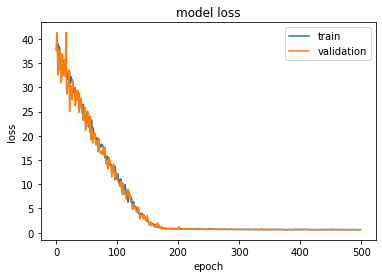

In [10]:
num_epochs = 500
train_sample_size = int(train_size*0.3)
small_train_dataset = train_dataset.unbatch().take(train_sample_size).batch(batch_size)
bnn_model_small = create_bnn_model(train_sample_size)
run_experiment(bnn_model_small, mse_loss, small_train_dataset, test_dataset)

In [11]:
def compute_predictions(model, iterations=100):
    predicted = []
    for _ in range(iterations):
        predicted.append(model(examples).numpy())
    predicted = np.concatenate(predicted, axis=1)

    prediction_mean = np.mean(predicted, axis=1).tolist()
    prediction_min = np.min(predicted, axis=1).tolist()
    prediction_max = np.max(predicted, axis=1).tolist()
    prediction_range = (np.max(predicted, axis=1) - np.min(predicted, axis=1)).tolist()

    for idx in range(sample):
        print(
            f"Predictions mean: {round(prediction_mean[idx], 2)}, "
            f"min: {round(prediction_min[idx], 2)}, "
            f"max: {round(prediction_max[idx], 2)}, "
            f"range: {round(prediction_range[idx], 2)} - "
            f"Actual: {targets[idx]}"
        )


compute_predictions(bnn_model_small)

Predictions mean: 6.01, min: 5.56, max: 6.31, range: 0.76 - Actual: 7.0
Predictions mean: 6.32, min: 5.53, max: 6.69, range: 1.16 - Actual: 7.0
Predictions mean: 6.15, min: 5.57, max: 6.46, range: 0.89 - Actual: 6.0
Predictions mean: 5.27, min: 4.44, max: 5.98, range: 1.54 - Actual: 4.0
Predictions mean: 5.92, min: 5.45, max: 6.2, range: 0.75 - Actual: 5.0
Predictions mean: 6.23, min: 5.48, max: 6.61, range: 1.13 - Actual: 6.0
Predictions mean: 5.84, min: 5.11, max: 6.28, range: 1.17 - Actual: 5.0
Predictions mean: 6.4, min: 6.01, max: 6.66, range: 0.65 - Actual: 6.0
Predictions mean: 6.14, min: 5.37, max: 6.5, range: 1.12 - Actual: 5.0
Predictions mean: 6.21, min: 5.38, max: 6.62, range: 1.24 - Actual: 6.0


## Train BNN with the whole training set

Start training the model ...
Epoch 1/500
17/17 [==============================] - 2s 39ms/step - loss: 31.9560 - root_mean_squared_error: 5.6527 - val_loss: 30.9010 - val_root_mean_squared_error: 5.5587
Epoch 2/500
17/17 [==============================] - 0s 10ms/step - loss: 31.2131 - root_mean_squared_error: 5.5866 - val_loss: 22.6975 - val_root_mean_squared_error: 4.7640
Epoch 3/500
17/17 [==============================] - 0s 10ms/step - loss: 30.5165 - root_mean_squared_error: 5.5240 - val_loss: 29.6839 - val_root_mean_squared_error: 5.4480
Epoch 4/500
17/17 [==============================] - 0s 10ms/step - loss: 29.7498 - root_mean_squared_error: 5.4541 - val_loss: 24.2608 - val_root_mean_squared_error: 4.9252
Epoch 5/500
17/17 [==============================] - 0s 8ms/step - loss: 28.0221 - root_mean_squared_error: 5.2934 - val_loss: 25.1528 - val_root_mean_squared_error: 5.0150
Epoch 6/500
17/17 [==============================] - 0s 10ms/step - loss: 26.4594 - root_mean_squared_

17/17 [==============================] - 0s 22ms/step - loss: 0.8033 - root_mean_squared_error: 0.8928 - val_loss: 0.9035 - val_root_mean_squared_error: 0.9469
Epoch 49/500
17/17 [==============================] - 0s 13ms/step - loss: 0.8266 - root_mean_squared_error: 0.9056 - val_loss: 0.8299 - val_root_mean_squared_error: 0.9078
Epoch 50/500
17/17 [==============================] - 0s 10ms/step - loss: 0.8150 - root_mean_squared_error: 0.8992 - val_loss: 0.8022 - val_root_mean_squared_error: 0.8922
Epoch 51/500
17/17 [==============================] - 0s 22ms/step - loss: 0.8059 - root_mean_squared_error: 0.8942 - val_loss: 0.7754 - val_root_mean_squared_error: 0.8768
Epoch 52/500
17/17 [==============================] - 0s 19ms/step - loss: 0.8386 - root_mean_squared_error: 0.9124 - val_loss: 0.7167 - val_root_mean_squared_error: 0.8428
Epoch 53/500
17/17 [==============================] - 0s 15ms/step - loss: 0.8892 - root_mean_squared_error: 0.9397 - val_loss: 0.6782 - val_root_me

17/17 [==============================] - 0s 9ms/step - loss: 0.6136 - root_mean_squared_error: 0.7788 - val_loss: 0.5958 - val_root_mean_squared_error: 0.7681
Epoch 96/500
17/17 [==============================] - 0s 20ms/step - loss: 0.6413 - root_mean_squared_error: 0.7962 - val_loss: 0.6249 - val_root_mean_squared_error: 0.7854
Epoch 97/500
17/17 [==============================] - 0s 20ms/step - loss: 0.6408 - root_mean_squared_error: 0.7959 - val_loss: 0.6265 - val_root_mean_squared_error: 0.7870
Epoch 98/500
17/17 [==============================] - 0s 11ms/step - loss: 0.6212 - root_mean_squared_error: 0.7835 - val_loss: 0.6229 - val_root_mean_squared_error: 0.7846
Epoch 99/500
17/17 [==============================] - 0s 10ms/step - loss: 0.6482 - root_mean_squared_error: 0.8006 - val_loss: 0.5977 - val_root_mean_squared_error: 0.7684
Epoch 100/500
17/17 [==============================] - 0s 10ms/step - loss: 0.6351 - root_mean_squared_error: 0.7925 - val_loss: 0.6866 - val_root_me

17/17 [==============================] - 0s 11ms/step - loss: 0.6073 - root_mean_squared_error: 0.7745 - val_loss: 0.5902 - val_root_mean_squared_error: 0.7633
Epoch 143/500
17/17 [==============================] - 0s 8ms/step - loss: 0.6012 - root_mean_squared_error: 0.7705 - val_loss: 0.6337 - val_root_mean_squared_error: 0.7914
Epoch 144/500
17/17 [==============================] - 0s 8ms/step - loss: 0.6010 - root_mean_squared_error: 0.7700 - val_loss: 0.6029 - val_root_mean_squared_error: 0.7713
Epoch 145/500
17/17 [==============================] - 0s 10ms/step - loss: 0.6175 - root_mean_squared_error: 0.7810 - val_loss: 0.5753 - val_root_mean_squared_error: 0.7540
Epoch 146/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5982 - root_mean_squared_error: 0.7684 - val_loss: 0.5764 - val_root_mean_squared_error: 0.7535
Epoch 147/500
17/17 [==============================] - 0s 10ms/step - loss: 0.6116 - root_mean_squared_error: 0.7773 - val_loss: 0.6071 - val_root

17/17 [==============================] - 0s 17ms/step - loss: 0.5928 - root_mean_squared_error: 0.7646 - val_loss: 0.5838 - val_root_mean_squared_error: 0.7590
Epoch 190/500
17/17 [==============================] - 0s 14ms/step - loss: 0.6049 - root_mean_squared_error: 0.7727 - val_loss: 0.5820 - val_root_mean_squared_error: 0.7575
Epoch 191/500
17/17 [==============================] - 0s 13ms/step - loss: 0.6064 - root_mean_squared_error: 0.7738 - val_loss: 0.5962 - val_root_mean_squared_error: 0.7666
Epoch 192/500
17/17 [==============================] - 0s 19ms/step - loss: 0.5973 - root_mean_squared_error: 0.7674 - val_loss: 0.6042 - val_root_mean_squared_error: 0.7715
Epoch 193/500
17/17 [==============================] - 0s 8ms/step - loss: 0.5986 - root_mean_squared_error: 0.7683 - val_loss: 0.6082 - val_root_mean_squared_error: 0.7741
Epoch 194/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5963 - root_mean_squared_error: 0.7669 - val_loss: 0.5818 - val_roo

17/17 [==============================] - 1s 38ms/step - loss: 0.5912 - root_mean_squared_error: 0.7636 - val_loss: 0.5834 - val_root_mean_squared_error: 0.7578
Epoch 237/500
17/17 [==============================] - 0s 15ms/step - loss: 0.5904 - root_mean_squared_error: 0.7628 - val_loss: 0.5993 - val_root_mean_squared_error: 0.7685
Epoch 238/500
17/17 [==============================] - 1s 41ms/step - loss: 0.6008 - root_mean_squared_error: 0.7693 - val_loss: 0.5983 - val_root_mean_squared_error: 0.7676
Epoch 239/500
17/17 [==============================] - 1s 35ms/step - loss: 0.5849 - root_mean_squared_error: 0.7588 - val_loss: 0.6217 - val_root_mean_squared_error: 0.7836
Epoch 240/500
17/17 [==============================] - 0s 22ms/step - loss: 0.5964 - root_mean_squared_error: 0.7668 - val_loss: 0.5683 - val_root_mean_squared_error: 0.7478
Epoch 241/500
17/17 [==============================] - 1s 42ms/step - loss: 0.5965 - root_mean_squared_error: 0.7666 - val_loss: 0.5783 - val_ro

17/17 [==============================] - 0s 10ms/step - loss: 0.5744 - root_mean_squared_error: 0.7518 - val_loss: 0.5906 - val_root_mean_squared_error: 0.7630
Epoch 284/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5859 - root_mean_squared_error: 0.7593 - val_loss: 0.5906 - val_root_mean_squared_error: 0.7629
Epoch 285/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5726 - root_mean_squared_error: 0.7507 - val_loss: 0.5906 - val_root_mean_squared_error: 0.7626
Epoch 286/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5923 - root_mean_squared_error: 0.7635 - val_loss: 0.5791 - val_root_mean_squared_error: 0.7550
Epoch 287/500
17/17 [==============================] - 0s 12ms/step - loss: 0.5985 - root_mean_squared_error: 0.7679 - val_loss: 0.6099 - val_root_mean_squared_error: 0.7750
Epoch 288/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5924 - root_mean_squared_error: 0.7641 - val_loss: 0.5600 - val_ro

17/17 [==============================] - 0s 12ms/step - loss: 0.5854 - root_mean_squared_error: 0.7594 - val_loss: 0.5667 - val_root_mean_squared_error: 0.7475
Epoch 331/500
17/17 [==============================] - 0s 10ms/step - loss: 0.5879 - root_mean_squared_error: 0.7604 - val_loss: 0.5772 - val_root_mean_squared_error: 0.7532
Epoch 332/500
17/17 [==============================] - 0s 13ms/step - loss: 0.5903 - root_mean_squared_error: 0.7625 - val_loss: 0.5824 - val_root_mean_squared_error: 0.7572
Epoch 333/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5925 - root_mean_squared_error: 0.7640 - val_loss: 0.5720 - val_root_mean_squared_error: 0.7500
Epoch 334/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5922 - root_mean_squared_error: 0.7636 - val_loss: 0.5812 - val_root_mean_squared_error: 0.7572
Epoch 335/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5830 - root_mean_squared_error: 0.7578 - val_loss: 0.5759 - val_ro

17/17 [==============================] - 0s 9ms/step - loss: 0.5878 - root_mean_squared_error: 0.7606 - val_loss: 0.5797 - val_root_mean_squared_error: 0.7551
Epoch 378/500
17/17 [==============================] - 0s 10ms/step - loss: 0.5875 - root_mean_squared_error: 0.7605 - val_loss: 0.5808 - val_root_mean_squared_error: 0.7558
Epoch 379/500
17/17 [==============================] - 0s 16ms/step - loss: 0.5857 - root_mean_squared_error: 0.7595 - val_loss: 0.5800 - val_root_mean_squared_error: 0.7551
Epoch 380/500
17/17 [==============================] - 0s 18ms/step - loss: 0.5867 - root_mean_squared_error: 0.7599 - val_loss: 0.5639 - val_root_mean_squared_error: 0.7447
Epoch 381/500
17/17 [==============================] - 0s 19ms/step - loss: 0.5868 - root_mean_squared_error: 0.7600 - val_loss: 0.5753 - val_root_mean_squared_error: 0.7515
Epoch 382/500
17/17 [==============================] - 0s 15ms/step - loss: 0.5864 - root_mean_squared_error: 0.7595 - val_loss: 0.5735 - val_roo

17/17 [==============================] - 0s 11ms/step - loss: 0.6036 - root_mean_squared_error: 0.7711 - val_loss: 0.5768 - val_root_mean_squared_error: 0.7526
Epoch 425/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5781 - root_mean_squared_error: 0.7541 - val_loss: 0.5732 - val_root_mean_squared_error: 0.7502
Epoch 426/500
17/17 [==============================] - 0s 20ms/step - loss: 0.5869 - root_mean_squared_error: 0.7600 - val_loss: 0.5815 - val_root_mean_squared_error: 0.7570
Epoch 427/500
17/17 [==============================] - 0s 8ms/step - loss: 0.5799 - root_mean_squared_error: 0.7553 - val_loss: 0.5637 - val_root_mean_squared_error: 0.7436
Epoch 428/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5792 - root_mean_squared_error: 0.7547 - val_loss: 0.5617 - val_root_mean_squared_error: 0.7423
Epoch 429/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5877 - root_mean_squared_error: 0.7608 - val_loss: 0.6249 - val_roo

17/17 [==============================] - 0s 12ms/step - loss: 0.5806 - root_mean_squared_error: 0.7559 - val_loss: 0.5650 - val_root_mean_squared_error: 0.7458
Epoch 472/500
17/17 [==============================] - 0s 12ms/step - loss: 0.5903 - root_mean_squared_error: 0.7622 - val_loss: 0.5551 - val_root_mean_squared_error: 0.7382
Epoch 473/500
17/17 [==============================] - 0s 11ms/step - loss: 0.5880 - root_mean_squared_error: 0.7605 - val_loss: 0.5800 - val_root_mean_squared_error: 0.7550
Epoch 474/500
17/17 [==============================] - 0s 12ms/step - loss: 0.5784 - root_mean_squared_error: 0.7539 - val_loss: 0.5565 - val_root_mean_squared_error: 0.7387
Epoch 475/500
17/17 [==============================] - 0s 13ms/step - loss: 0.5777 - root_mean_squared_error: 0.7536 - val_loss: 0.5635 - val_root_mean_squared_error: 0.7435
Epoch 476/500
17/17 [==============================] - 1s 36ms/step - loss: 0.5911 - root_mean_squared_error: 0.7625 - val_loss: 0.5775 - val_ro

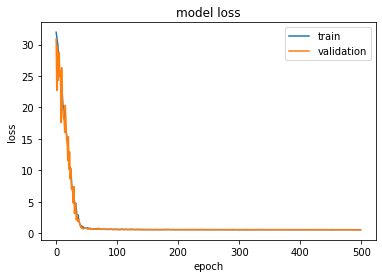

In [12]:
num_epochs = 500
bnn_model_full = create_bnn_model(train_size)
run_experiment(bnn_model_full, mse_loss, train_dataset, test_dataset)

compute_predictions(bnn_model_full)

# Experiment 3: probabilistic Bayesian neural network

In [13]:
def create_probablistic_bnn_model(train_size):
    inputs = create_model_inputs()
    features = keras.layers.concatenate(list(inputs.values()))
    features = layers.BatchNormalization()(features)

    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)

    distribution_params = layers.Dense(units=2)(features)
    outputs = tfp.layers.IndependentNormal(1)(distribution_params)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

Start training the model ...
Epoch 1/1000
17/17 [==============================] - 4s 68ms/step - loss: 53.5235 - root_mean_squared_error: 6.9228 - val_loss: 82.5068 - val_root_mean_squared_error: 6.9323
Epoch 2/1000
17/17 [==============================] - 0s 11ms/step - loss: 57.3257 - root_mean_squared_error: 6.7324 - val_loss: 55.0285 - val_root_mean_squared_error: 6.4623
Epoch 3/1000
17/17 [==============================] - 0s 11ms/step - loss: 41.3382 - root_mean_squared_error: 6.7308 - val_loss: 25.3346 - val_root_mean_squared_error: 6.9737
Epoch 4/1000
17/17 [==============================] - 0s 8ms/step - loss: 33.6377 - root_mean_squared_error: 6.8126 - val_loss: 39.5770 - val_root_mean_squared_error: 6.6233
Epoch 5/1000
17/17 [==============================] - 0s 10ms/step - loss: 38.1313 - root_mean_squared_error: 6.5475 - val_loss: 24.4145 - val_root_mean_squared_error: 6.4336
Epoch 6/1000
17/17 [==============================] - 0s 10ms/step - loss: 25.4217 - root_mean_sq

Epoch 48/1000
17/17 [==============================] - 0s 10ms/step - loss: 2.4812 - root_mean_squared_error: 4.3113 - val_loss: 2.4192 - val_root_mean_squared_error: 4.0100
Epoch 49/1000
17/17 [==============================] - 0s 11ms/step - loss: 2.3995 - root_mean_squared_error: 4.0367 - val_loss: 2.3381 - val_root_mean_squared_error: 3.8291
Epoch 50/1000
17/17 [==============================] - 0s 11ms/step - loss: 2.3523 - root_mean_squared_error: 3.8003 - val_loss: 2.2438 - val_root_mean_squared_error: 3.6339
Epoch 51/1000
17/17 [==============================] - 0s 11ms/step - loss: 2.2895 - root_mean_squared_error: 3.6501 - val_loss: 2.4197 - val_root_mean_squared_error: 4.0829
Epoch 52/1000
17/17 [==============================] - 0s 11ms/step - loss: 2.2651 - root_mean_squared_error: 3.6229 - val_loss: 2.1579 - val_root_mean_squared_error: 3.2764
Epoch 53/1000
17/17 [==============================] - 0s 11ms/step - loss: 2.1793 - root_mean_squared_error: 3.3054 - val_loss: 2

17/17 [==============================] - 0s 11ms/step - loss: 1.2592 - root_mean_squared_error: 1.1860 - val_loss: 1.2484 - val_root_mean_squared_error: 1.1966
Epoch 96/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.2508 - root_mean_squared_error: 1.1906 - val_loss: 1.2310 - val_root_mean_squared_error: 1.2357
Epoch 97/1000
17/17 [==============================] - 0s 14ms/step - loss: 1.2451 - root_mean_squared_error: 1.2039 - val_loss: 1.2197 - val_root_mean_squared_error: 1.2414
Epoch 98/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.2477 - root_mean_squared_error: 1.1613 - val_loss: 1.2477 - val_root_mean_squared_error: 1.1536
Epoch 99/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.2514 - root_mean_squared_error: 1.1737 - val_loss: 1.2190 - val_root_mean_squared_error: 1.1501
Epoch 100/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.2756 - root_mean_squared_error: 1.2183 - val_loss: 1.2683 - val_ro

Epoch 142/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1967 - root_mean_squared_error: 1.1336 - val_loss: 1.2329 - val_root_mean_squared_error: 1.1323
Epoch 143/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1939 - root_mean_squared_error: 1.1127 - val_loss: 1.2069 - val_root_mean_squared_error: 1.1223
Epoch 144/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.2130 - root_mean_squared_error: 1.1333 - val_loss: 1.2073 - val_root_mean_squared_error: 1.1404
Epoch 145/1000
17/17 [==============================] - 0s 20ms/step - loss: 1.1937 - root_mean_squared_error: 1.1217 - val_loss: 1.1873 - val_root_mean_squared_error: 1.1510
Epoch 146/1000
17/17 [==============================] - 0s 20ms/step - loss: 1.2030 - root_mean_squared_error: 1.1249 - val_loss: 1.1723 - val_root_mean_squared_error: 1.1257
Epoch 147/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.2049 - root_mean_squared_error: 1.1181 - val_l

Epoch 189/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1843 - root_mean_squared_error: 1.1062 - val_loss: 1.1783 - val_root_mean_squared_error: 1.1092
Epoch 190/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1942 - root_mean_squared_error: 1.1220 - val_loss: 1.1916 - val_root_mean_squared_error: 1.0987
Epoch 191/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1802 - root_mean_squared_error: 1.0824 - val_loss: 1.1873 - val_root_mean_squared_error: 1.1386
Epoch 192/1000
17/17 [==============================] - 0s 10ms/step - loss: 1.1768 - root_mean_squared_error: 1.1020 - val_loss: 1.2547 - val_root_mean_squared_error: 1.1337
Epoch 193/1000
17/17 [==============================] - 0s 22ms/step - loss: 1.2016 - root_mean_squared_error: 1.0964 - val_loss: 1.1849 - val_root_mean_squared_error: 1.0921
Epoch 194/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1963 - root_mean_squared_error: 1.1321 - val_l

Epoch 236/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1919 - root_mean_squared_error: 1.1105 - val_loss: 1.1568 - val_root_mean_squared_error: 1.1090
Epoch 237/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1750 - root_mean_squared_error: 1.1121 - val_loss: 1.1952 - val_root_mean_squared_error: 1.1012
Epoch 238/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1708 - root_mean_squared_error: 1.0900 - val_loss: 1.1659 - val_root_mean_squared_error: 1.1218
Epoch 239/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1752 - root_mean_squared_error: 1.0929 - val_loss: 1.1800 - val_root_mean_squared_error: 1.0655
Epoch 240/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1786 - root_mean_squared_error: 1.0862 - val_loss: 1.1741 - val_root_mean_squared_error: 1.1191
Epoch 241/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1806 - root_mean_squared_error: 1.1105 - val_l

Epoch 283/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1656 - root_mean_squared_error: 1.0852 - val_loss: 1.1810 - val_root_mean_squared_error: 1.1078
Epoch 284/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1814 - root_mean_squared_error: 1.0838 - val_loss: 1.1791 - val_root_mean_squared_error: 1.0958
Epoch 285/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1721 - root_mean_squared_error: 1.1010 - val_loss: 1.1868 - val_root_mean_squared_error: 1.0515
Epoch 286/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1697 - root_mean_squared_error: 1.0963 - val_loss: 1.1545 - val_root_mean_squared_error: 1.1172
Epoch 287/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1602 - root_mean_squared_error: 1.1048 - val_loss: 1.1556 - val_root_mean_squared_error: 1.0647
Epoch 288/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1776 - root_mean_squared_error: 1.1179 - val_l

Epoch 330/1000
17/17 [==============================] - 0s 18ms/step - loss: 1.1650 - root_mean_squared_error: 1.0917 - val_loss: 1.1488 - val_root_mean_squared_error: 1.0812
Epoch 331/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1762 - root_mean_squared_error: 1.1023 - val_loss: 1.1980 - val_root_mean_squared_error: 1.1198
Epoch 332/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1810 - root_mean_squared_error: 1.0914 - val_loss: 1.1563 - val_root_mean_squared_error: 1.0635
Epoch 333/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1753 - root_mean_squared_error: 1.1084 - val_loss: 1.1725 - val_root_mean_squared_error: 1.0981
Epoch 334/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1747 - root_mean_squared_error: 1.0730 - val_loss: 1.1607 - val_root_mean_squared_error: 1.0417
Epoch 335/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.1687 - root_mean_squared_error: 1.1005 - val_lo

Epoch 377/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1742 - root_mean_squared_error: 1.0932 - val_loss: 1.1632 - val_root_mean_squared_error: 1.1181
Epoch 378/1000
17/17 [==============================] - 0s 15ms/step - loss: 1.1729 - root_mean_squared_error: 1.0841 - val_loss: 1.1739 - val_root_mean_squared_error: 1.0549
Epoch 379/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1695 - root_mean_squared_error: 1.0988 - val_loss: 1.1676 - val_root_mean_squared_error: 1.1023
Epoch 380/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1649 - root_mean_squared_error: 1.0928 - val_loss: 1.1629 - val_root_mean_squared_error: 1.0887
Epoch 381/1000
17/17 [==============================] - 0s 8ms/step - loss: 1.1720 - root_mean_squared_error: 1.1007 - val_loss: 1.1588 - val_root_mean_squared_error: 1.0808
Epoch 382/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.1667 - root_mean_squared_error: 1.0890 - val_los

Epoch 424/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1790 - root_mean_squared_error: 1.1013 - val_loss: 1.1649 - val_root_mean_squared_error: 1.0943
Epoch 425/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1603 - root_mean_squared_error: 1.0917 - val_loss: 1.1532 - val_root_mean_squared_error: 1.1115
Epoch 426/1000
17/17 [==============================] - 0s 14ms/step - loss: 1.1590 - root_mean_squared_error: 1.0864 - val_loss: 1.1710 - val_root_mean_squared_error: 1.0719
Epoch 427/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1573 - root_mean_squared_error: 1.0671 - val_loss: 1.1733 - val_root_mean_squared_error: 1.0799
Epoch 428/1000
17/17 [==============================] - 0s 27ms/step - loss: 1.1625 - root_mean_squared_error: 1.0843 - val_loss: 1.1536 - val_root_mean_squared_error: 1.0751
Epoch 429/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1675 - root_mean_squared_error: 1.0673 - val_l

Epoch 471/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1625 - root_mean_squared_error: 1.0674 - val_loss: 1.1640 - val_root_mean_squared_error: 1.0716
Epoch 472/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1565 - root_mean_squared_error: 1.0977 - val_loss: 1.1470 - val_root_mean_squared_error: 1.0941
Epoch 473/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1661 - root_mean_squared_error: 1.0665 - val_loss: 1.1461 - val_root_mean_squared_error: 1.1005
Epoch 474/1000
17/17 [==============================] - 0s 22ms/step - loss: 1.1628 - root_mean_squared_error: 1.0670 - val_loss: 1.1587 - val_root_mean_squared_error: 1.0898
Epoch 475/1000
17/17 [==============================] - 0s 15ms/step - loss: 1.1602 - root_mean_squared_error: 1.0752 - val_loss: 1.1658 - val_root_mean_squared_error: 1.0940
Epoch 476/1000
17/17 [==============================] - 0s 14ms/step - loss: 1.1603 - root_mean_squared_error: 1.0931 - val_l

Epoch 518/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1647 - root_mean_squared_error: 1.0805 - val_loss: 1.1750 - val_root_mean_squared_error: 1.1053
Epoch 519/1000
17/17 [==============================] - 0s 14ms/step - loss: 1.1576 - root_mean_squared_error: 1.0573 - val_loss: 1.1570 - val_root_mean_squared_error: 1.0822
Epoch 520/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1686 - root_mean_squared_error: 1.0870 - val_loss: 1.1611 - val_root_mean_squared_error: 1.0597
Epoch 521/1000
17/17 [==============================] - 0s 8ms/step - loss: 1.1584 - root_mean_squared_error: 1.0723 - val_loss: 1.1757 - val_root_mean_squared_error: 1.0845
Epoch 522/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1692 - root_mean_squared_error: 1.0749 - val_loss: 1.1520 - val_root_mean_squared_error: 1.0667
Epoch 523/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1679 - root_mean_squared_error: 1.0991 - val_lo

Epoch 565/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1560 - root_mean_squared_error: 1.0702 - val_loss: 1.1476 - val_root_mean_squared_error: 1.0477
Epoch 566/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1683 - root_mean_squared_error: 1.0961 - val_loss: 1.1856 - val_root_mean_squared_error: 1.0724
Epoch 567/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1574 - root_mean_squared_error: 1.0755 - val_loss: 1.1606 - val_root_mean_squared_error: 1.1142
Epoch 568/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1625 - root_mean_squared_error: 1.0920 - val_loss: 1.1468 - val_root_mean_squared_error: 1.0696
Epoch 569/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1561 - root_mean_squared_error: 1.0918 - val_loss: 1.1693 - val_root_mean_squared_error: 1.0313
Epoch 570/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1579 - root_mean_squared_error: 1.0762 - val_l

Epoch 612/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1540 - root_mean_squared_error: 1.0796 - val_loss: 1.1654 - val_root_mean_squared_error: 1.0325
Epoch 613/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1637 - root_mean_squared_error: 1.0645 - val_loss: 1.1438 - val_root_mean_squared_error: 1.0957
Epoch 614/1000
17/17 [==============================] - 0s 20ms/step - loss: 1.1465 - root_mean_squared_error: 1.0654 - val_loss: 1.1562 - val_root_mean_squared_error: 1.0934
Epoch 615/1000
17/17 [==============================] - 0s 18ms/step - loss: 1.1609 - root_mean_squared_error: 1.0684 - val_loss: 1.1622 - val_root_mean_squared_error: 1.0691
Epoch 616/1000
17/17 [==============================] - 0s 17ms/step - loss: 1.1551 - root_mean_squared_error: 1.0660 - val_loss: 1.1628 - val_root_mean_squared_error: 1.0857
Epoch 617/1000
17/17 [==============================] - 0s 23ms/step - loss: 1.1644 - root_mean_squared_error: 1.0924 - val_l

Epoch 659/1000
17/17 [==============================] - 0s 16ms/step - loss: 1.1647 - root_mean_squared_error: 1.0875 - val_loss: 1.1616 - val_root_mean_squared_error: 1.0628
Epoch 660/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1528 - root_mean_squared_error: 1.0687 - val_loss: 1.1536 - val_root_mean_squared_error: 1.1105
Epoch 661/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1531 - root_mean_squared_error: 1.0566 - val_loss: 1.1561 - val_root_mean_squared_error: 1.0277
Epoch 662/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1590 - root_mean_squared_error: 1.0789 - val_loss: 1.1761 - val_root_mean_squared_error: 1.0943
Epoch 663/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1528 - root_mean_squared_error: 1.0674 - val_loss: 1.1667 - val_root_mean_squared_error: 1.0775
Epoch 664/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.1637 - root_mean_squared_error: 1.0682 - val_lo

Epoch 706/1000
17/17 [==============================] - 0s 21ms/step - loss: 1.1496 - root_mean_squared_error: 1.0549 - val_loss: 1.1672 - val_root_mean_squared_error: 1.1018
Epoch 707/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1637 - root_mean_squared_error: 1.0747 - val_loss: 1.1779 - val_root_mean_squared_error: 1.0866
Epoch 708/1000
17/17 [==============================] - 0s 14ms/step - loss: 1.1580 - root_mean_squared_error: 1.0900 - val_loss: 1.1618 - val_root_mean_squared_error: 1.0631
Epoch 709/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1577 - root_mean_squared_error: 1.0708 - val_loss: 1.1485 - val_root_mean_squared_error: 1.0830
Epoch 710/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1556 - root_mean_squared_error: 1.0672 - val_loss: 1.1543 - val_root_mean_squared_error: 1.0534
Epoch 711/1000
17/17 [==============================] - 0s 23ms/step - loss: 1.1489 - root_mean_squared_error: 1.0699 - val_l

Epoch 753/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1532 - root_mean_squared_error: 1.0668 - val_loss: 1.1437 - val_root_mean_squared_error: 1.0630
Epoch 754/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1498 - root_mean_squared_error: 1.0729 - val_loss: 1.1516 - val_root_mean_squared_error: 1.0622
Epoch 755/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1629 - root_mean_squared_error: 1.0872 - val_loss: 1.1579 - val_root_mean_squared_error: 1.0504
Epoch 756/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.1464 - root_mean_squared_error: 1.0587 - val_loss: 1.1690 - val_root_mean_squared_error: 1.0560
Epoch 757/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1518 - root_mean_squared_error: 1.0875 - val_loss: 1.1530 - val_root_mean_squared_error: 1.0456
Epoch 758/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1464 - root_mean_squared_error: 1.0672 - val_lo

Epoch 800/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1504 - root_mean_squared_error: 1.0597 - val_loss: 1.1607 - val_root_mean_squared_error: 1.0541
Epoch 801/1000
17/17 [==============================] - 0s 19ms/step - loss: 1.1530 - root_mean_squared_error: 1.0654 - val_loss: 1.1496 - val_root_mean_squared_error: 1.0257
Epoch 802/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1500 - root_mean_squared_error: 1.0684 - val_loss: 1.1513 - val_root_mean_squared_error: 1.0995
Epoch 803/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1513 - root_mean_squared_error: 1.0687 - val_loss: 1.1478 - val_root_mean_squared_error: 1.0826
Epoch 804/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1521 - root_mean_squared_error: 1.0580 - val_loss: 1.1643 - val_root_mean_squared_error: 1.0981
Epoch 805/1000
17/17 [==============================] - 0s 10ms/step - loss: 1.1494 - root_mean_squared_error: 1.0522 - val_l

Epoch 847/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1516 - root_mean_squared_error: 1.0810 - val_loss: 1.1470 - val_root_mean_squared_error: 1.0124
Epoch 848/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1494 - root_mean_squared_error: 1.0553 - val_loss: 1.1480 - val_root_mean_squared_error: 1.0460
Epoch 849/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1450 - root_mean_squared_error: 1.0672 - val_loss: 1.1476 - val_root_mean_squared_error: 1.0946
Epoch 850/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1482 - root_mean_squared_error: 1.0562 - val_loss: 1.1574 - val_root_mean_squared_error: 1.0504
Epoch 851/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1443 - root_mean_squared_error: 1.0666 - val_loss: 1.1435 - val_root_mean_squared_error: 1.0975
Epoch 852/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1544 - root_mean_squared_error: 1.0711 - val_l

Epoch 894/1000
17/17 [==============================] - 0s 16ms/step - loss: 1.1491 - root_mean_squared_error: 1.0629 - val_loss: 1.1620 - val_root_mean_squared_error: 1.0544
Epoch 895/1000
17/17 [==============================] - 0s 26ms/step - loss: 1.1561 - root_mean_squared_error: 1.1000 - val_loss: 1.1521 - val_root_mean_squared_error: 1.0252
Epoch 896/1000
17/17 [==============================] - 0s 19ms/step - loss: 1.1507 - root_mean_squared_error: 1.0585 - val_loss: 1.1860 - val_root_mean_squared_error: 1.0886
Epoch 897/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1507 - root_mean_squared_error: 1.0788 - val_loss: 1.1431 - val_root_mean_squared_error: 1.0499
Epoch 898/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1520 - root_mean_squared_error: 1.0787 - val_loss: 1.1536 - val_root_mean_squared_error: 1.0776
Epoch 899/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1520 - root_mean_squared_error: 1.0803 - val_l

Epoch 941/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1418 - root_mean_squared_error: 1.0709 - val_loss: 1.1600 - val_root_mean_squared_error: 1.0571
Epoch 942/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.1410 - root_mean_squared_error: 1.0688 - val_loss: 1.1713 - val_root_mean_squared_error: 1.0973
Epoch 943/1000
17/17 [==============================] - 0s 11ms/step - loss: 1.1471 - root_mean_squared_error: 1.0353 - val_loss: 1.1572 - val_root_mean_squared_error: 1.1103
Epoch 944/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1513 - root_mean_squared_error: 1.0804 - val_loss: 1.1541 - val_root_mean_squared_error: 1.0386
Epoch 945/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.1456 - root_mean_squared_error: 1.0542 - val_loss: 1.1424 - val_root_mean_squared_error: 1.0603
Epoch 946/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1458 - root_mean_squared_error: 1.0591 - val_lo

Epoch 988/1000
17/17 [==============================] - 0s 10ms/step - loss: 1.1484 - root_mean_squared_error: 1.0738 - val_loss: 1.1551 - val_root_mean_squared_error: 1.0414
Epoch 989/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1462 - root_mean_squared_error: 1.0536 - val_loss: 1.1480 - val_root_mean_squared_error: 1.0781
Epoch 990/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1443 - root_mean_squared_error: 1.0535 - val_loss: 1.1496 - val_root_mean_squared_error: 1.0918
Epoch 991/1000
17/17 [==============================] - 0s 18ms/step - loss: 1.1501 - root_mean_squared_error: 1.0819 - val_loss: 1.1620 - val_root_mean_squared_error: 1.0770
Epoch 992/1000
17/17 [==============================] - 0s 26ms/step - loss: 1.1446 - root_mean_squared_error: 1.0660 - val_loss: 1.1631 - val_root_mean_squared_error: 1.1131
Epoch 993/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.1418 - root_mean_squared_error: 1.0702 - val_l

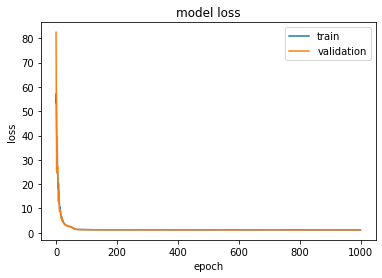

In [14]:
def negative_loglikelihood(targets, estimated_distribution):
    return -estimated_distribution.log_prob(targets)


num_epochs = 1000
prob_bnn_model = create_probablistic_bnn_model(train_size)
run_experiment(prob_bnn_model, negative_loglikelihood, train_dataset, test_dataset)

In [15]:
prediction_distribution = prob_bnn_model(examples)
prediction_mean = prediction_distribution.mean().numpy().tolist()
prediction_stdv = prediction_distribution.stddev().numpy()

upper = (prediction_mean + (1.96 * prediction_stdv)).tolist()
lower = (prediction_mean - (1.96 * prediction_stdv)).tolist()
prediction_stdv = prediction_stdv.tolist()

for idx in range(sample):
    print(
        f"Prediction mean: {round(prediction_mean[idx][0], 2)}, "
        f"stddev: {round(prediction_stdv[idx][0], 2)}, "
        f"95% CI: [{round(upper[idx][0], 2)} - {round(lower[idx][0], 2)}]"
        f" - Actual: {targets[idx]}"
    )

Prediction mean: 6.36, stddev: 0.8, 95% CI: [7.93 - 4.79] - Actual: 7.0
Prediction mean: 6.56, stddev: 0.82, 95% CI: [8.17 - 4.95] - Actual: 7.0
Prediction mean: 6.2, stddev: 0.78, 95% CI: [7.72 - 4.68] - Actual: 6.0
Prediction mean: 5.29, stddev: 0.69, 95% CI: [6.64 - 3.94] - Actual: 4.0
Prediction mean: 6.31, stddev: 0.79, 95% CI: [7.86 - 4.76] - Actual: 5.0
Prediction mean: 6.52, stddev: 0.81, 95% CI: [8.11 - 4.93] - Actual: 6.0
Prediction mean: 5.48, stddev: 0.7, 95% CI: [6.86 - 4.1] - Actual: 5.0
Prediction mean: 6.54, stddev: 0.83, 95% CI: [8.16 - 4.91] - Actual: 6.0
Prediction mean: 6.09, stddev: 0.77, 95% CI: [7.59 - 4.58] - Actual: 5.0
Prediction mean: 6.54, stddev: 0.83, 95% CI: [8.17 - 4.92] - Actual: 6.0
